In [3]:
import matplotlib.pyplot as plt
import pandas as pd

from config.project_config import get_data_path

# Analyses
from src.analyses.schedule_jobs_dataframe import jobs_metrics_from_operations_df, mean_start_deviation_per_shift_df


# Plots
from src.analyses.fig_experiment import make_combined_figure_startdeviation_tardiness_earliness

In [7]:
sub_directory = "2025_09_01"
max_utilization  = 0.75

experiments_file_path = get_data_path(
    sub_directory,
    f"experiments_{max_utilization:.2f}".replace(".", "_")
)

schedules_file_path = get_data_path(
        sub_directory,
        f"schedules_{max_utilization:.2f}".replace(".", "_")
)

In [1]:
df_experiments = pd.read_csv(f"{experiments_file_path}.csv")
df_experiments

NameError: name 'pd' is not defined

In [9]:
df_schedules = pd.read_csv(f"{schedules_file_path}.csv")
df_schedules

,Job,Routing_ID,Experiment_ID,Arrival,Ready Time,Due Date,Shift,Operation,Machine,Original Duration,Start,End
0,01-07500-0000,01-07,1,0,1440,3405,1,0,M02,31,2150,2181
1,01-07500-0000,01-07,2,0,1440,3405,1,0,M02,31,2150,2181
2,01-07500-0000,01-07,3,0,1440,3405,1,0,M02,31,2150,2181
3,01-07500-0000,01-07,4,0,1440,3405,1,0,M02,31,1762,1793
4,01-07500-0000,01-07,5,0,1440,3405,1,0,M02,31,1762,1793
...,...,...,...,...,...,...,...,...,...,...,...,...
352094,01-07500-0463,01-07,56,40291,40320,42562,28,9,M03,79,42483,42562
352095,01-07500-0463,01-07,57,40291,40320,42562,28,9,M03,79,42483,42562
352096,01-07500-0463,01-07,58,40291,40320,42562,28,9,M03,79,42483,42562
352097,01-07500-0463,01-07,59,40291,40320,42562,28,9,M03,79,42483,42562


## Evaluation Dataframes

### Tardiness/Earliness (Metrics)

In [27]:
df_metrics = jobs_metrics_from_operations_df(df_schedules)
df_metrics

,Job,Routing_ID,Experiment_ID,Shift,Arrival,Due Date,Completion,Tardiness,Earliness,Lateness
0,01-07500-0000,01-07,1,1,0,3405,2966,0,439,-439
1,01-07500-0001,01-06,1,1,60,2433,2374,0,59,-59
2,01-07500-0002,01-01,1,1,142,2766,2479,0,287,-287
3,01-07500-0003,01-05,1,1,197,2641,2567,0,74,-74
4,01-07500-0004,01-04,1,1,249,3582,3114,0,468,-468
...,...,...,...,...,...,...,...,...,...,...
27835,01-07500-0459,01-05,60,28,39882,41171,41304,133,0,133
27836,01-07500-0460,01-03,60,28,39956,41951,41951,0,0,0
27837,01-07500-0461,01-05,60,28,40221,42220,42423,203,0,203
27838,01-07500-0462,01-01,60,28,40236,41639,42238,599,0,599


### Start Deviation

In [29]:
df_dev = mean_start_deviation_per_shift_df(df_schedules)
df_dev.head(12)

,Experiment_ID,Shift,Deviation,Pairs
0,1,2,44.000000,20
1,1,3,73.900000,20
2,1,4,55.480769,52
3,1,5,122.537736,106
4,1,6,73.925000,40
5,1,7,0.000000,2
6,1,8,45.513514,37
7,1,9,66.303371,89
8,1,10,81.085714,35
9,1,11,100.000000,36


## Examples

In [42]:
df_experiments_filtered = df_experiments[
    (df_experiments["Abs Lateness Ratio"] == 0.5) &
    (df_experiments["Inner Tardiness Ratio"] == 0.5)
]

df_experiments_filtered

,Experiment_ID,Abs Lateness Ratio,Inner Tardiness Ratio,Max Bottleneck Utilization,Sim Sigma,Shift Length,w_t,w_e,w_dev
21,22,0.5,0.5,0.75,0.2,1440,1,1,2
22,23,0.5,0.5,0.75,0.4,1440,1,1,2
23,24,0.5,0.5,0.75,0.6,1440,1,1,2


In [ ]:
experiment_id  = 1

### Tardiness/Earliness (Metrics)

In [ ]:
from src.analyses.fig_tardiness_earliness import make_fig_tardiness_earliness_only

fig = make_fig_tardiness_earliness_only(df_metrics, experiment_id=experiment_id, y_step=120, show_earliness=True)
plt.show()

### Start Deviation

In [ ]:
from src.analyses.fig_startdeviation import make_fig_startdeviation_only

fig = make_fig_startdeviation_only(df_dev, experiment_id=experiment_id, y_step=120)
plt.show()

### Vergleich

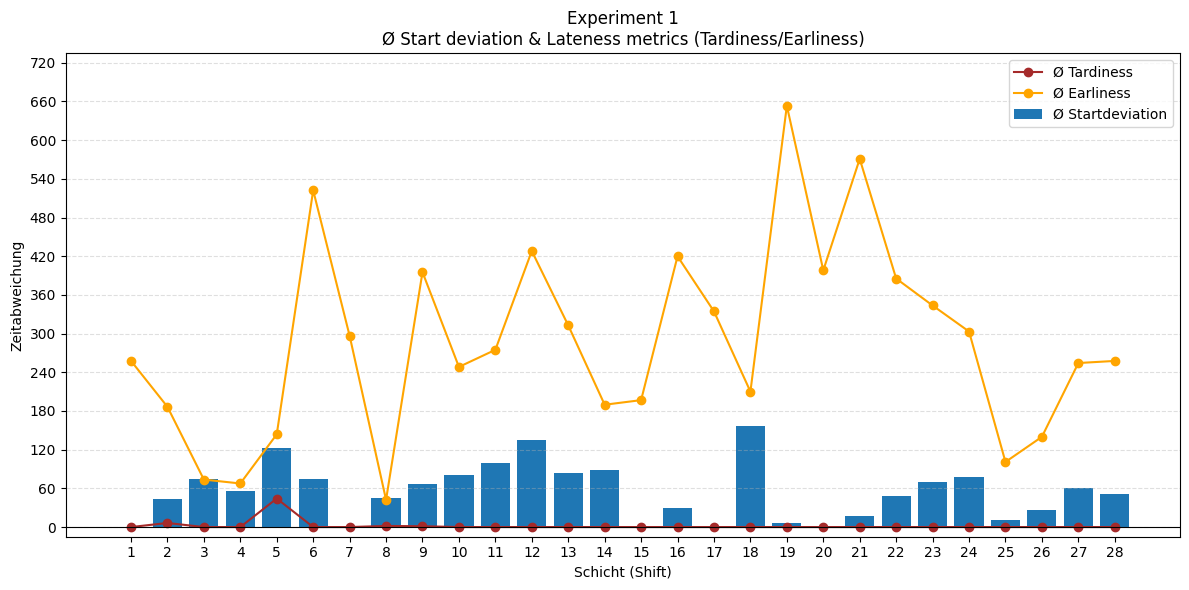

In [41]:
fig = make_combined_figure_startdeviation_tardiness_earliness(
    df_dev=df_dev,
    df_metrics=df_metrics,
    experiment_id=experiment_id,
    y_step=60,
    y_max = 720,
    title=f"Experiment {experiment_id}"
          + f"\nØ Start deviation & Lateness metrics (Tardiness/Earliness)"
)
plt.show()

In [66]:
def get_experiment_string(df, experiment_id):
    row = df[df["Experiment_ID"] == experiment_id].iloc[0]
    return (
        f"Experiment {experiment_id}\n"
        f"lateness/deviation = {row['Abs Lateness Ratio']:.2f}, "
        f"tardiness/earliness = {row['Inner Tardiness Ratio']:.2f}, "
        f"bottleneck utilization = {row['Max Bottleneck Utilization']:.2f} "
        f"(sigma = {row['Sim Sigma']:.2f})"
    )

# Beispiel
print(get_experiment_string(df_experiments, 7))


Experiment 7
lateness/deviation = 0.25, tardiness/earliness = 0.50, bottleneck utilization = 0.75 (sigma = 0.20)


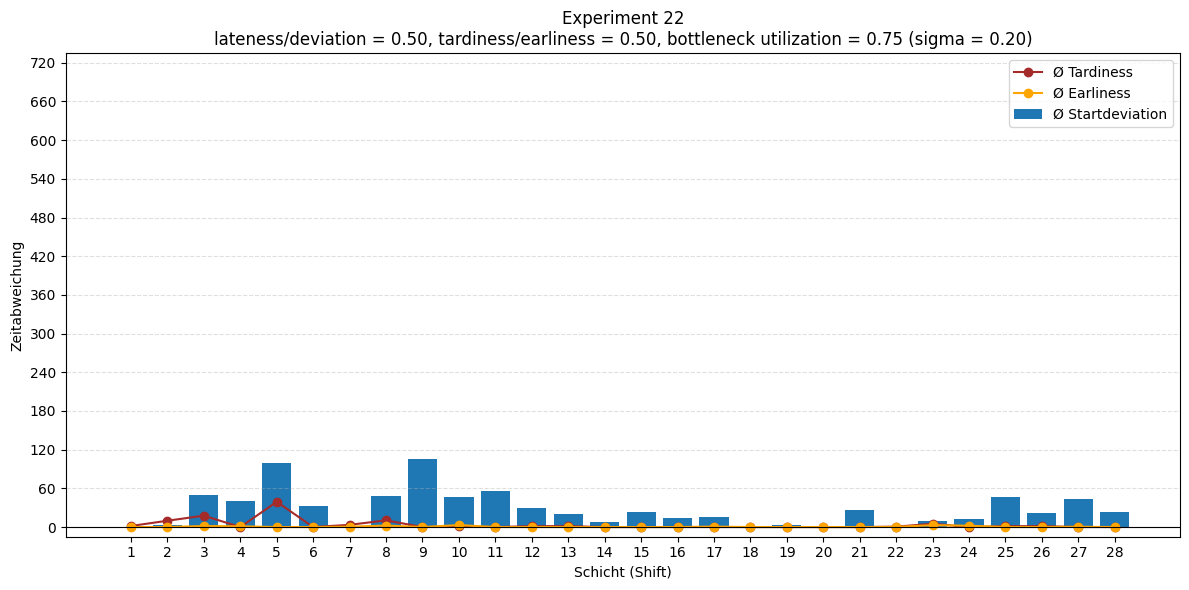

In [67]:
experiment_id  = 22
fig = make_combined_figure_startdeviation_tardiness_earliness(
    df_dev=df_dev,
    df_metrics=df_metrics,
    experiment_id=experiment_id,
    y_step=60,
    y_max = 720,
    title=f"{get_experiment_string(df_experiments, experiment_id)}"
)
plt.show()

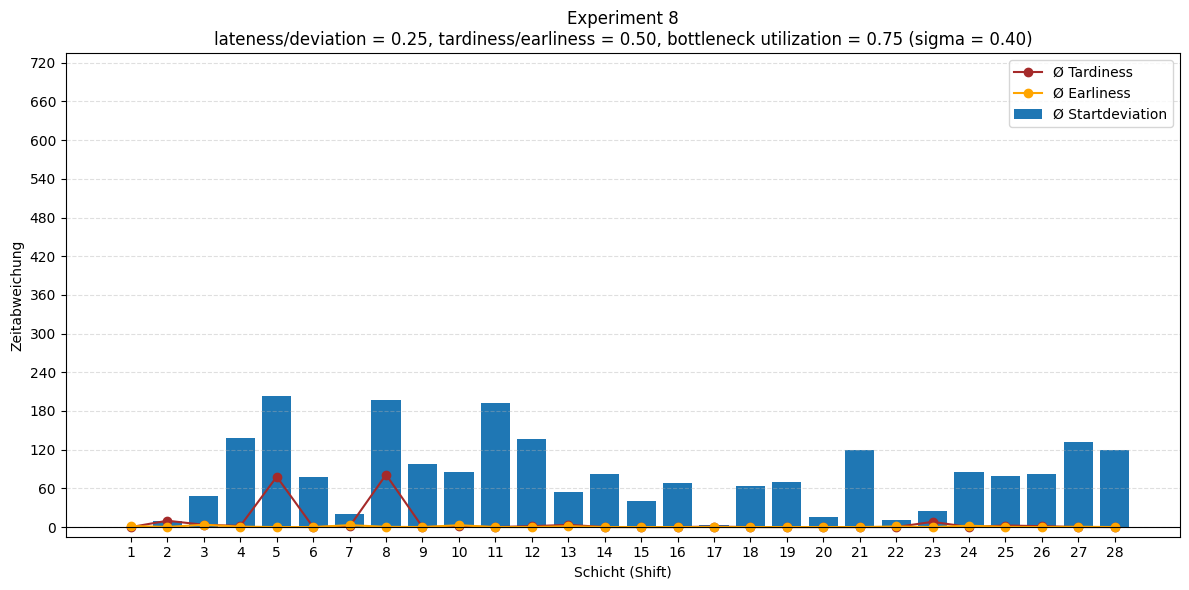

In [84]:
df_experiments_filtered = df_experiments[
    (df_experiments["Abs Lateness Ratio"] == 0.25) &
    (df_experiments["Inner Tardiness Ratio"] == 0.5) &
    (df_experiments["Sim Sigma"] == 0.4)
]

experiment_ids = df_experiments_filtered["Experiment_ID"].tolist()


for experiment_id in experiment_ids:
    make_combined_figure_startdeviation_tardiness_earliness(
        df_dev=df_dev,
        df_metrics=df_metrics,
        experiment_id=experiment_id,
        y_step=60,
        y_max = 720,
        title=f"{get_experiment_string(df_experiments, experiment_id)}"
    )
    plt.show()
